In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print("Initial shape:", df.shape)
df.head()

Initial shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Drop rows with missing target variable
df.dropna(subset=['Survived'], inplace=True)

# Features and target variable
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [4]:
# Encode 'Sex' as binary: female=0, male=1
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Fill missing Age values with median
X['Age'].fillna(X['Age'].median(), inplace=True)

print("Missing values after preprocessing:\n", X.isnull().sum())

Missing values after preprocessing:
 Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (712, 6)
Test shape: (179, 6)


In [6]:
rf = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train, y_train)

print(f"\nOOB Score: {rf.oob_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, rf.predict(X_test)):.4f}")


OOB Score: 0.8146
Test Accuracy: 0.8212


In [7]:
y_pred = rf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



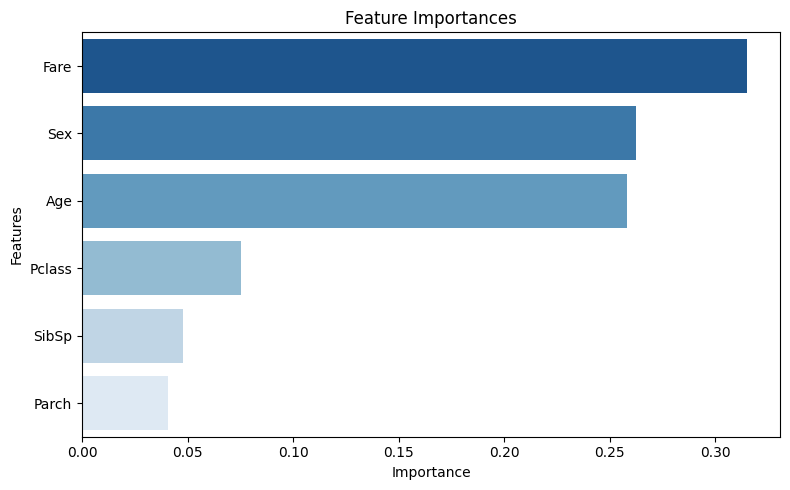

In [8]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="Blues_r")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

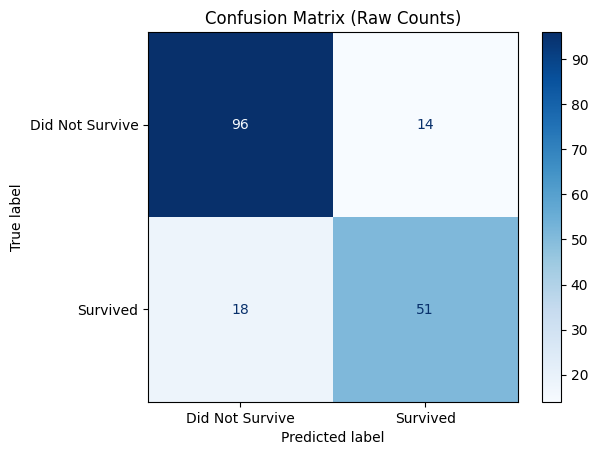

In [9]:
cm = confusion_matrix(y_test, y_pred)

# Raw confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Survive', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Raw Counts)")
plt.show()

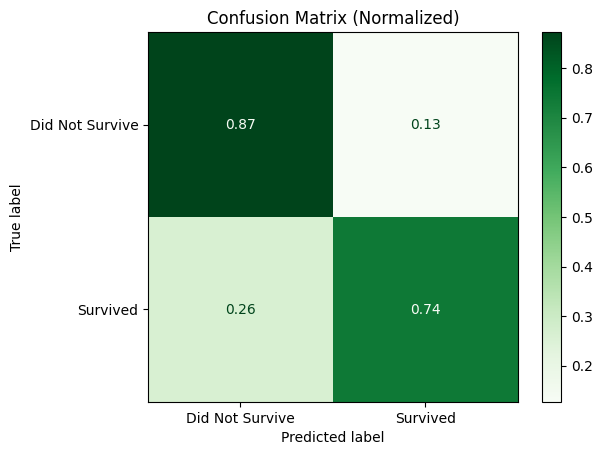

In [10]:
# Normalized confusion matrix
disp_normalized = ConfusionMatrixDisplay.from_estimator(
    rf, X_test, y_test, display_labels=['Did Not Survive', 'Survived'],
    cmap='Greens', normalize='true'
)
disp_normalized.ax_.set_title("Confusion Matrix (Normalized)")
plt.show()

In [11]:
sample = X_test.iloc[0:1]
prediction = rf.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")



Sample Passenger: {'Pclass': 3.0, 'Sex': 1.0, 'Age': 24.0, 'SibSp': 2.0, 'Parch': 0.0, 'Fare': 24.15}
Predicted Survival: Did Not Survive
